# Customer Churn Prediction Project
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

### Introduction
What is Customer Churn?¶
Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.


To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few.

As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy.

## 1) Problem statement.

You are asked to develop a machine learning model that can predict customers who will leave the company.
You are expected to perform the necessary data analysis and feature engineering steps before developing the model.

## 2) Data Collection.
* This Dataset is collected from the kaggle.
* The data consists of 7043 Rows and 21 Columns

https://www.kaggle.com/code/rodrigomichilles/churn-prediction

### 2.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

**Import the CSV Data as Pandas DataFrame**

In [2]:
df = pd.read_csv(r"Customer-Churn.csv")

**Show Top 5 Records**

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Shape of the dataset**

In [4]:
df.shape

(7043, 21)

**Summary of the dataset**

In [5]:
# Display summary statistics for a dataframe
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Check Datatypes in the dataset**

In [6]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 3. EXPLORING DATA

In [7]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['SeniorCitizen', 'tenure', 'MonthlyCharges']

We have 18 categorical features : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [8]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

customerID
7590-VHVEG    0.014198
3791-LGQCY    0.014198
6008-NAIXK    0.014198
5956-YHHRX    0.014198
5365-LLFYV    0.014198
                ...   
9796-MVYXX    0.014198
2637-FKFSY    0.014198
1552-AAGRX    0.014198
4304-TSPVK    0.014198
3186-AJIEK    0.014198
Name: proportion, Length: 7043, dtype: float64
---------------------------
gender
Male      50.47565
Female    49.52435
Name: proportion, dtype: float64
---------------------------
Partner
No     51.69672
Yes    48.30328
Name: proportion, dtype: float64
---------------------------
Dependents
No     70.041176
Yes    29.958824
Name: proportion, dtype: float64
---------------------------
PhoneService
Yes    90.316626
No      9.683374
Name: proportion, dtype: float64
---------------------------
MultipleLines
No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: proportion, dtype: float64
---------------------------
InternetService
Fiber optic    43.958540
DSL            34.374556
No       

**Insights**
 - `customerID` have unique vlaues for each column which can be dropped as it it of no importance

## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are
* **Bivariate Analysis:** The analysis of two variables.
* **Multivariate Analysis:** The analysis of two or more variables.

### Numerical Features

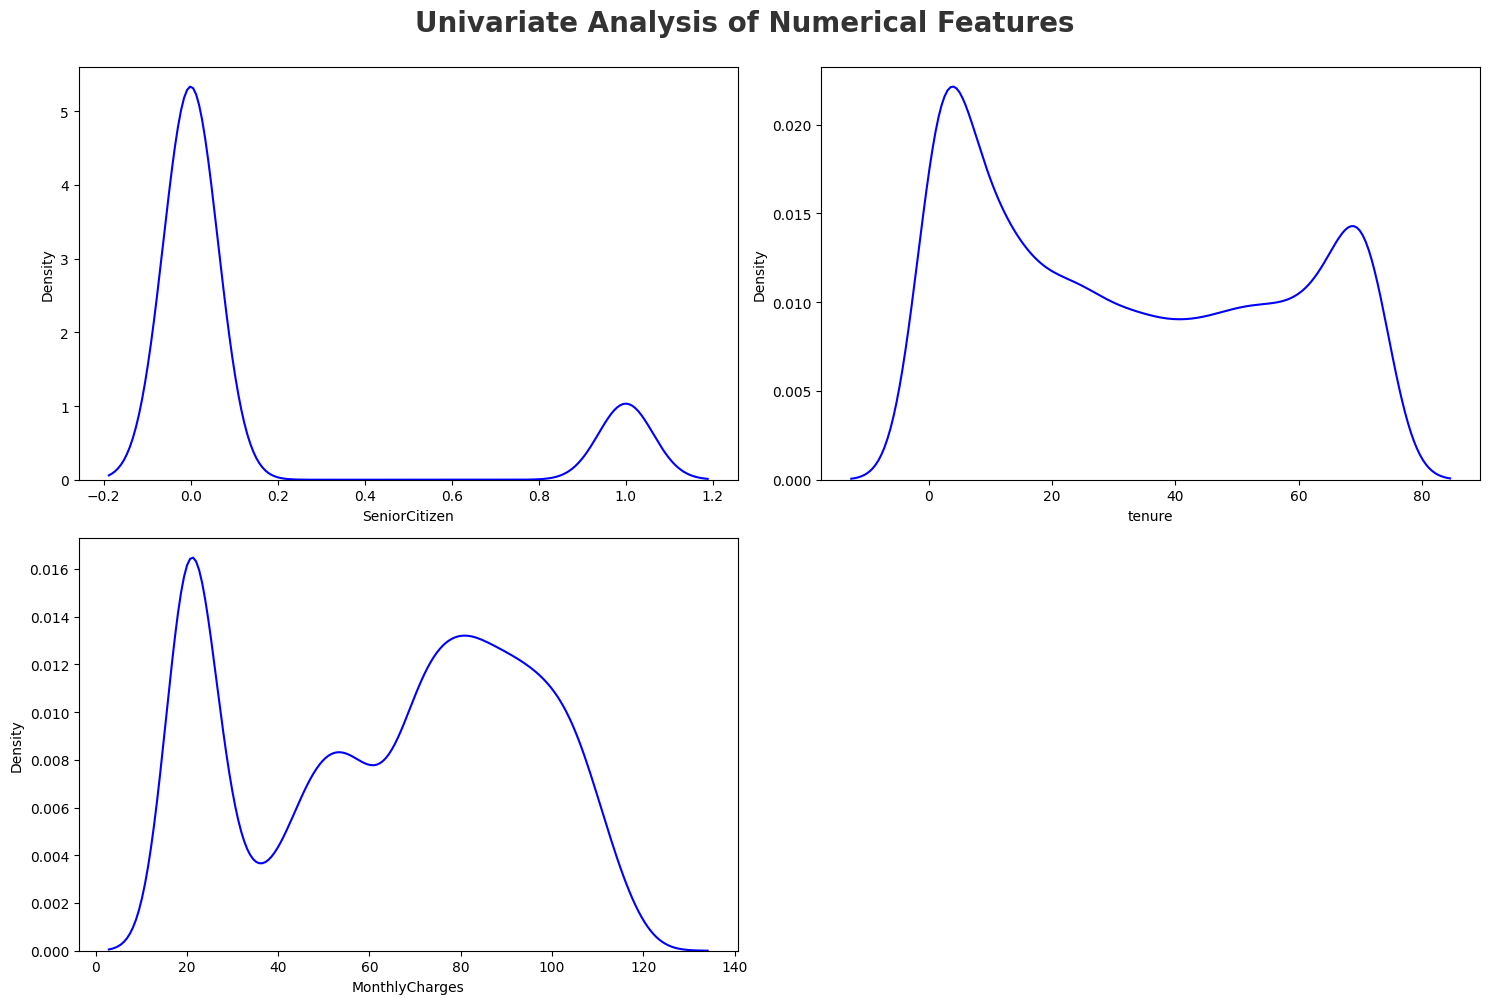

In [9]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Num.png')

**Insights**
 - `SeniorCitizen` column looks more skewed but it may be because of outlies.
 - `MonthlyCharges` is a right-skewed distribution.

### Categorical Features

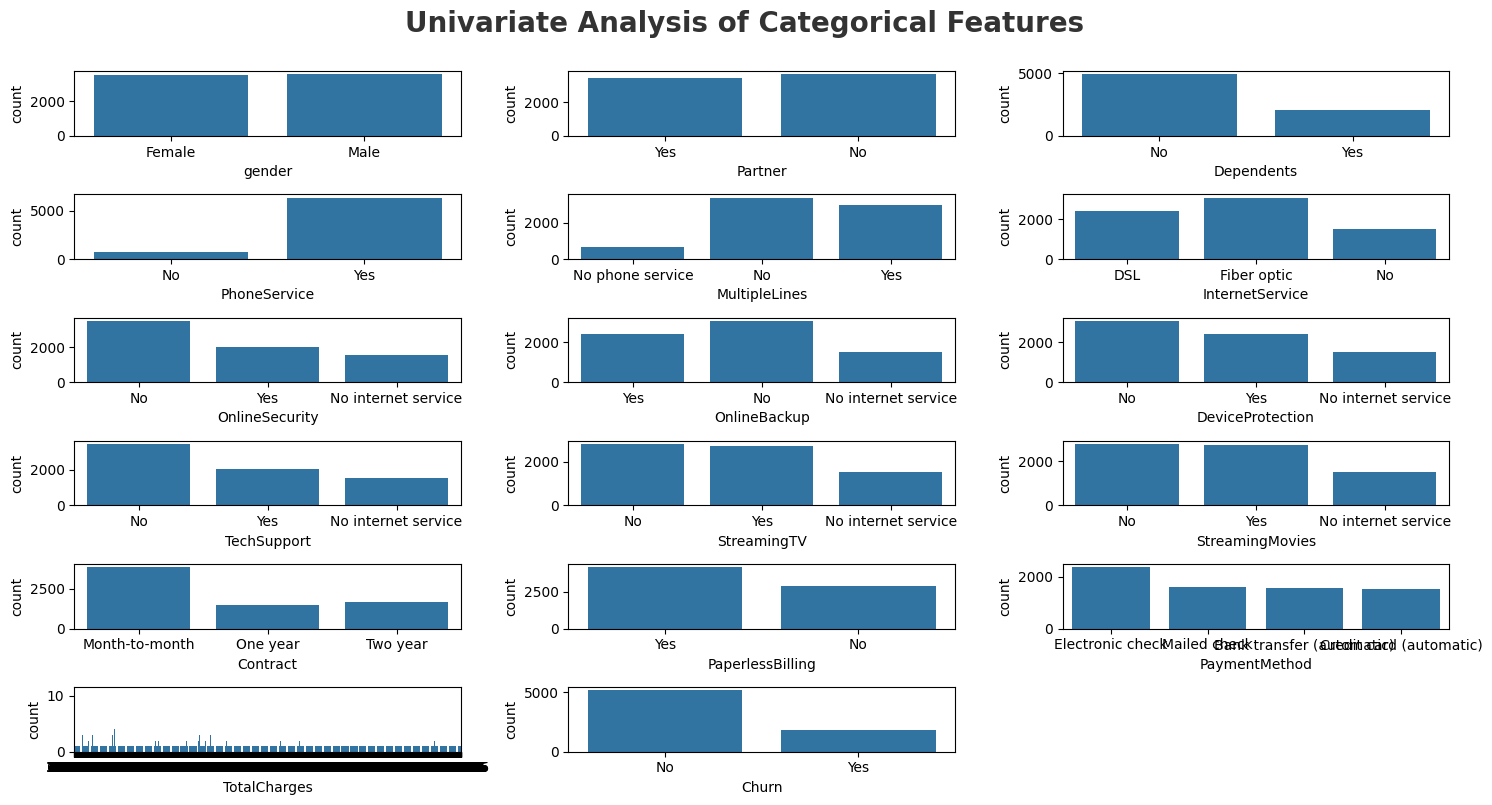

In [10]:
# categorical columns
if 'customerID' in categorical_features:
    categorical_features.remove('customerID')

# Determine the number of rows and columns needed
import math
n_cols = 3
n_rows = math.ceil(len(categorical_features) / n_cols)

plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(n_rows,n_cols, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

**Insights**
 - `PhoneService` coulmns have single category dominating.
 - In rest of the columns are balanced.

### Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

In [14]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 1 discrete features : ['SeniorCitizen']

We have 2 continuous_features : ['tenure', 'MonthlyCharges']


### Check Multicollinearity in Numerical features

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Insights**
 - There is no multicollinearity between any variables

### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e case_status**

Null Hypothesis ($ H_0 $): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis ($ H_1 $): The Feature and Target column are not independent (Correalted)

In [18]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['Churn'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,gender,Fail to Reject Null Hypothesis
1,Partner,Reject Null Hypothesis
2,Dependents,Reject Null Hypothesis
3,PhoneService,Fail to Reject Null Hypothesis
4,MultipleLines,Reject Null Hypothesis
5,InternetService,Reject Null Hypothesis
6,OnlineSecurity,Reject Null Hypothesis
7,OnlineBackup,Reject Null Hypothesis
8,DeviceProtection,Reject Null Hypothesis
9,TechSupport,Reject Null Hypothesis


**Report** 
* Here `gender`,`PhoneService`,and `TotalCharges` fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

### Checking Null Values

In [19]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['tenure', 'MonthlyCharges']


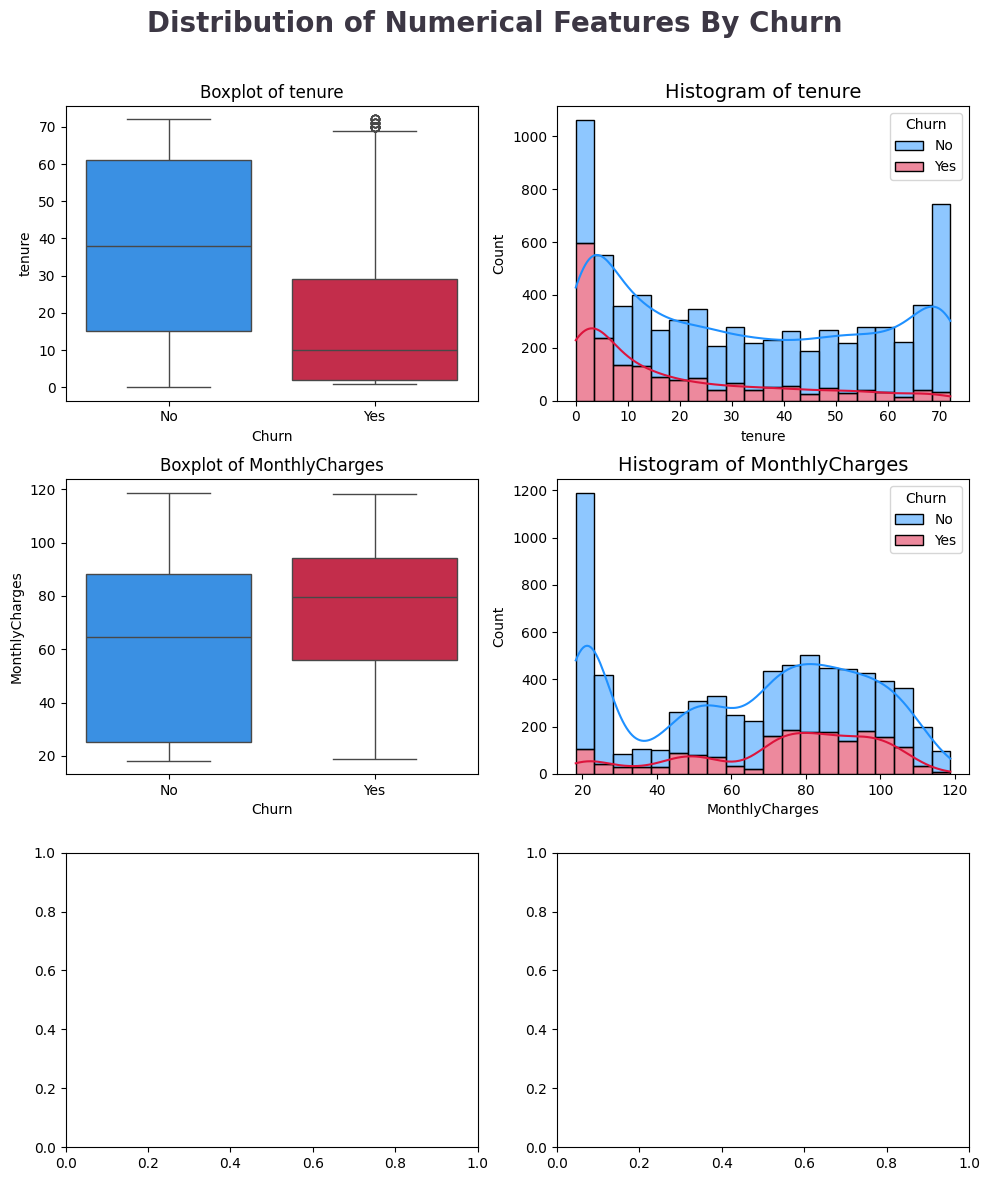

In [21]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Churn', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continues_features):   
    sns.boxplot(data=df, x='Churn', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='Churn', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.savefig('images/multivariate_num.png')

## Initial Analysis Report

* **tenure has many outliers which can be Handled in Feature Engineering and `tenure` is Right Skewed.**
* **`MonthlyCharges` is right skewed and No outliers found below the lower bound of Box plot.**
* **There are No missing values in the dataset.**
* **The `customerID` column can be deleted because each row has unique values.**
* **The `Churn` column is the target to predict.**
* **In the Categorical column, features can be made Binary numerical in feature Encoding**

## 4. Visualization

### 4.1 Visualize the Target Feature

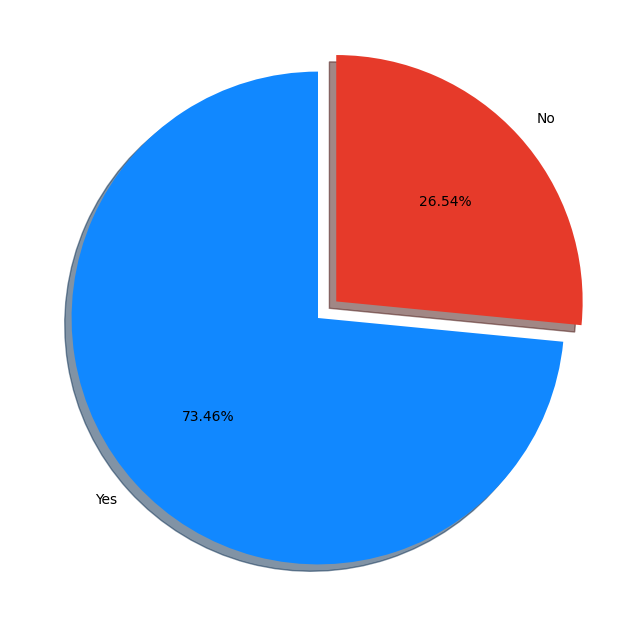

In [23]:
percentage = df.Churn.value_counts(normalize=True)*100
labels = ["Yes","No"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

* From the chart it is seen that the Target Variable is Imbalanced
**What is imbalanced data?**

Imbalanced data are types of data where the target class has an uneven distribution of observations, i.e Here `No` value has more count than the Certified value of the dataset.

### 4.2 Does Customer Gender has any impact on Churn ?

In [24]:
#group data by continent and their count of case_status
df.groupby('gender')['Churn'].value_counts(normalize=True).to_frame()*100

proportion
gender Churn            
Female No      73.079128
       Yes     26.920872
Male   No      73.839662
       Yes     26.160338

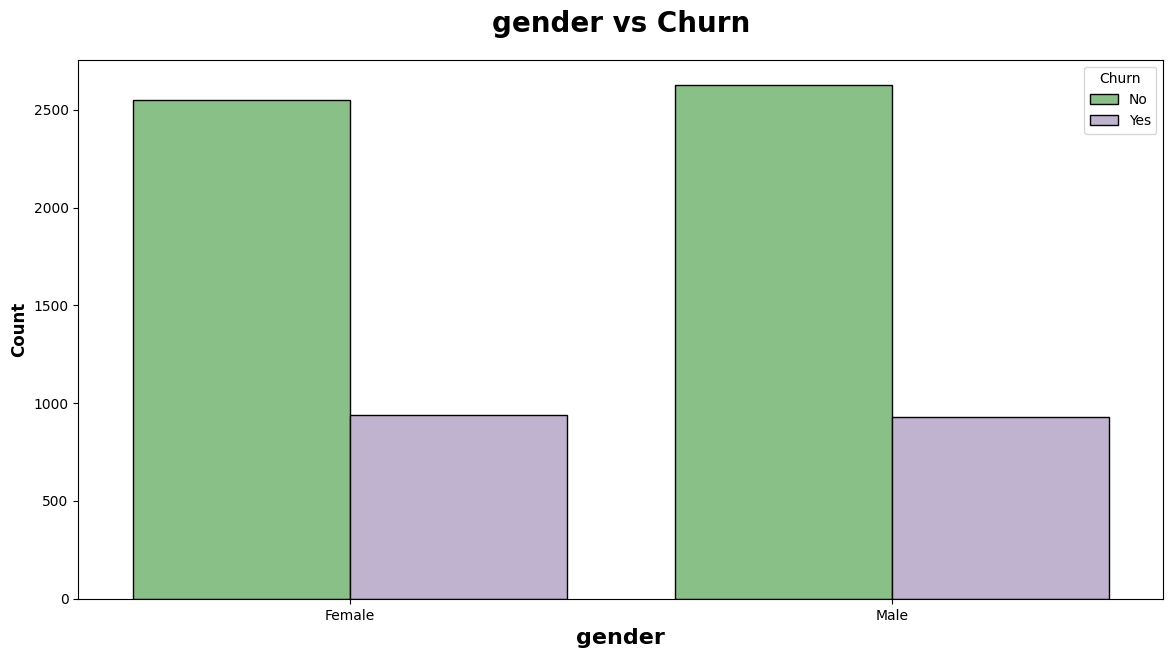

In [25]:
plt.subplots(figsize=(14,7))
sns.countplot(x="gender",hue="Churn", data=df, ec = "black",palette="Accent")
plt.title("gender vs Churn", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("gender", weight="bold", fontsize=16)
plt.legend(title="Churn", fancybox=True)
plt.show()

In [26]:
df2 = df.copy()

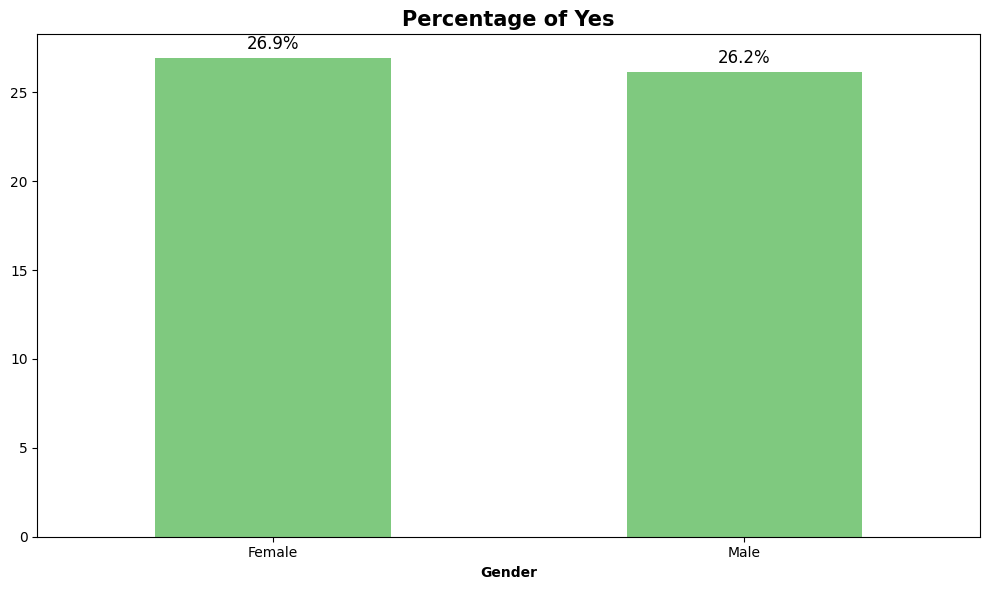

In [30]:
plt.figure(figsize=[10, 6])  # Adjust the figure size to a more manageable value

# Calculate percentage of 'Yes' churn by gender
order1 = 100 * df2[df2["Churn"] == 'Yes']['gender'].value_counts() / df2['gender'].value_counts()

# Plot the bar chart
order1.plot(kind='bar', stacked=True, colormap='Accent')
plt.title("Percentage of Yes", fontsize=15, fontweight='bold')

# Annotate the bars with percentage values
for n in range(order1.shape[0]):
    count = order1.iloc[n]
    strt = '{:0.1f}%'.format(count)
    plt.text(n, count + 0.5, strt, ha='center', fontsize=12)

plt.xlabel('Gender', fontweight='bold')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


**Report:**
* As per the Chart Female customer more than other Male customer.
* 26.9% of customer are Female.

### 4.3 Does partner has any impact on Churn ?

In [31]:
#group data by Education and their count of case_status
df.groupby('Partner')['Churn'].value_counts(normalize=True).to_frame()*100

proportion
Partner Churn            
No      No      67.042021
        Yes     32.957979
Yes     No      80.335097
        Yes     19.664903

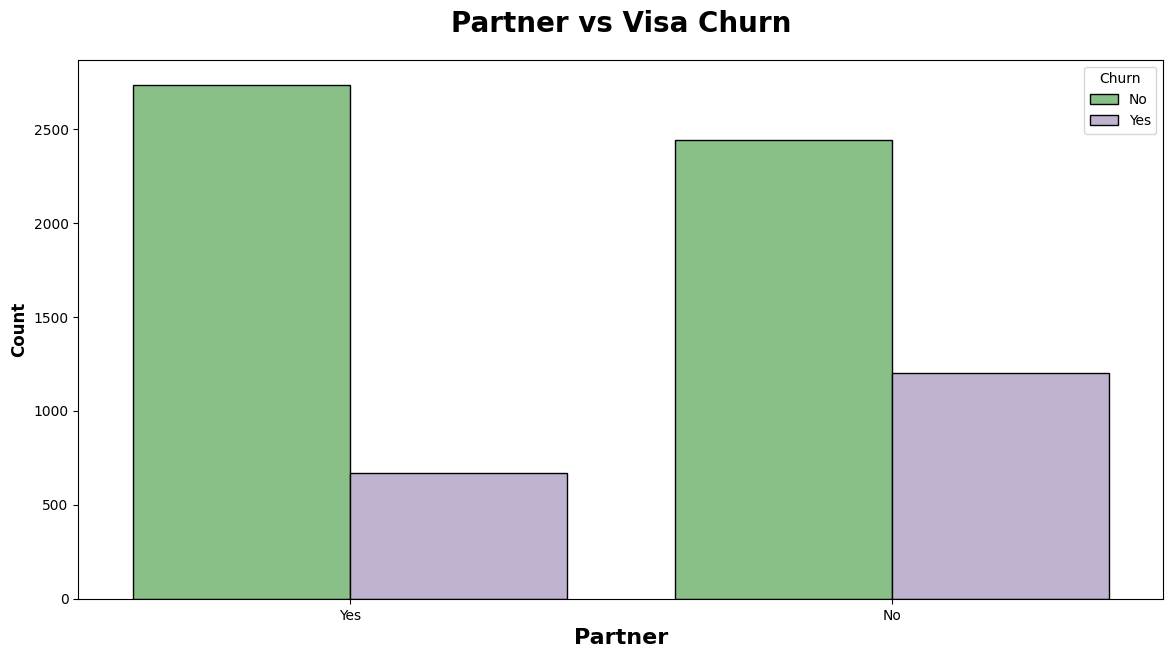

In [32]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Partner",hue="Churn", data=df, ec = "black",palette="Accent")
plt.title("Partner vs Visa Churn", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Partner", weight="bold", fontsize=16)
plt.legend(title="Churn", fancybox=True)
plt.show()

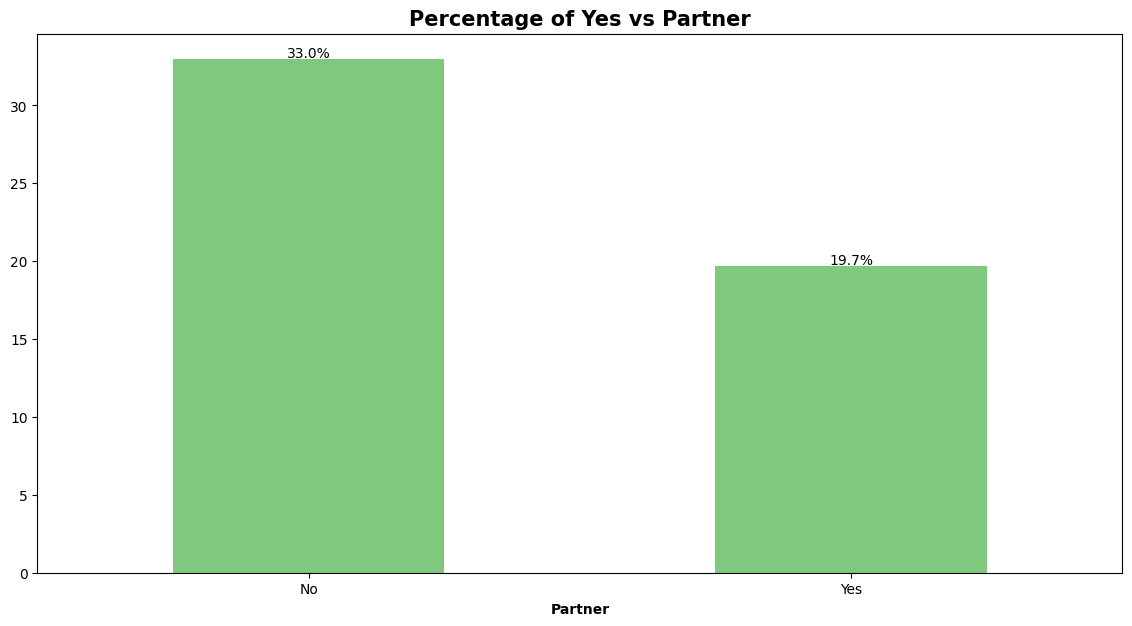

In [33]:
plt.figure(figsize=[14,7])

(100*df2[df2["Churn"].isin(['Yes'])]['Partner'].value_counts()/df2['Partner'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Yes vs Partner" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["Churn"].isin(['Yes'])]['Partner'].value_counts()/df2['Partner'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Partner' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Insights**
- Partner status has high impact
- 33% of customer who have No partner have Churned.

# Now start from here 22/10/2024

### 4.4 Does applicant's previous work experience has any impact on Visa status ?

In [31]:
#group data by has_job_experience and count case_status
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

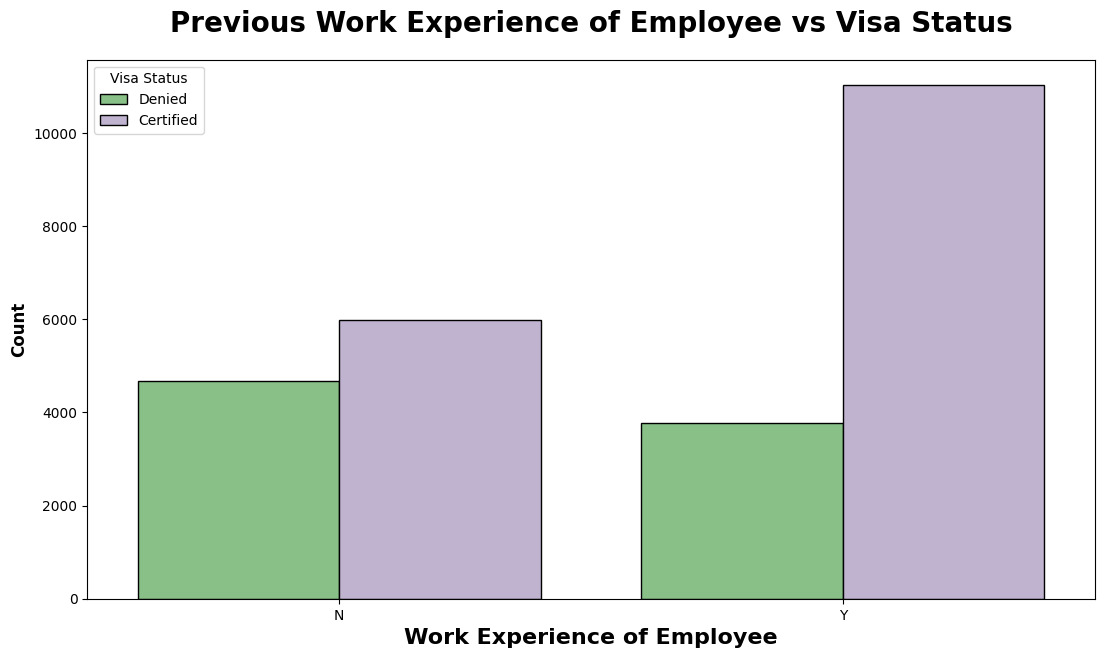

In [32]:
plt.subplots(figsize=(13,7))
sns.countplot(x="has_job_experience",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Previous Work Experience of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Work Experience of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

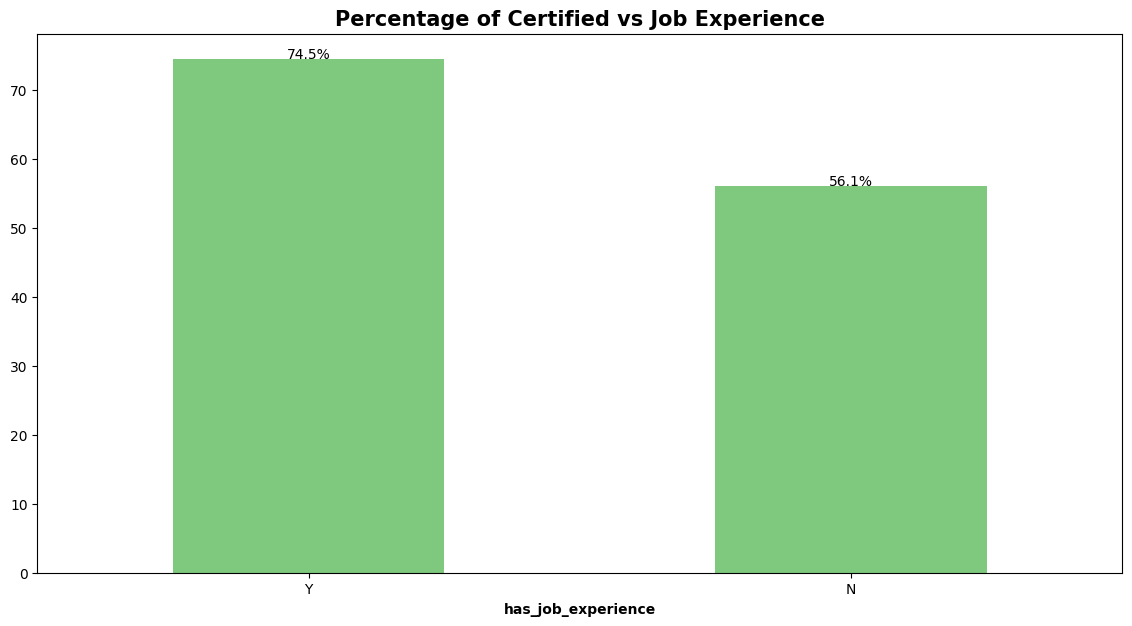

In [33]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Job Experience" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('has_job_experience' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
* People with previous work experience has been certified 74.5% only 25.5% applicant has been denied.
* People with No previous work experience has been certified 56% and denied 43%.
* This means work experience has effect on Visa status.
* There is a slight edge for the people with work experiences then the fresheres as expected. But the difference is not huge.

### 4.5 If the Employee requires job training, does it make any impact on visa status?

In [34]:
#group data by requires_job_training and count case_status
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

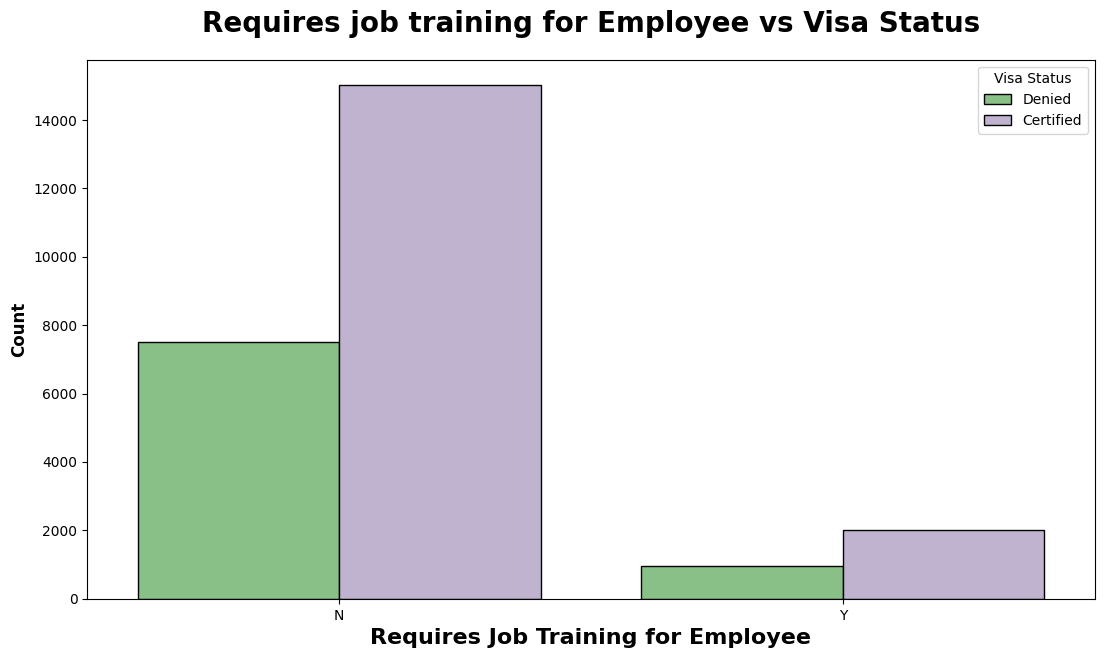

In [35]:
plt.subplots(figsize=(13,7))
sns.countplot(x="requires_job_training",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Requires job training for Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

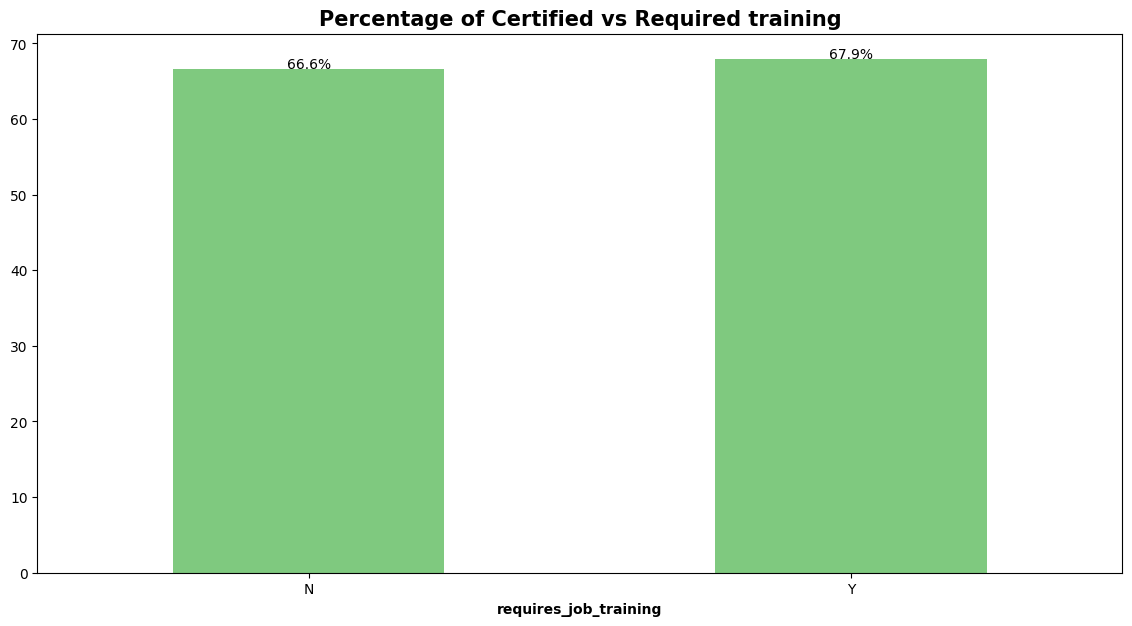

In [36]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Required training" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('requires_job_training' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
* If employee requires job training and it doesn't have any effect on Visa status.
* 88% of applicant don't require job training. 
* 63% of people who doesnt want job training got certified.
* For employees who require job training 67% of people get certified.
* As we checked in Chi-Squared test this feature doesn't have much impact on target variable, which is confirmed by above plot.

### 4.6 Does Number of employees of employer has any impact on Visa status?

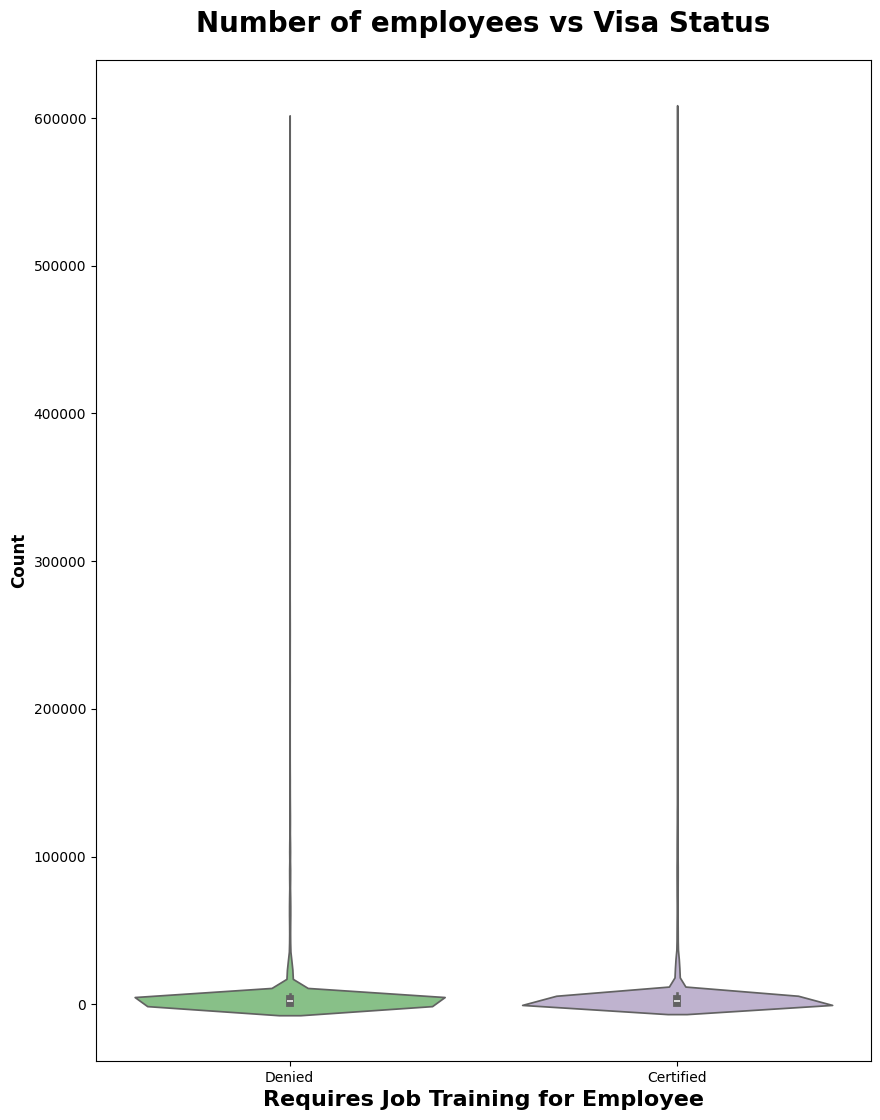

In [37]:
plt.subplots(figsize=(10,13))
sns.violinplot(x="case_status",y='no_of_employees', data=df, palette="Accent")
plt.title("Number of employees vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.ylim()
plt.show()

**Insights**
 - The distrubution of both is similar. But there are outliers in both the classes which need to be handeled.

### 4.7 Wages and its impact on Visa status

In [38]:
#group data by unit_of_wage and count the case_status
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True)

unit_of_wage  case_status
Hour          Denied         0.653686
              Certified      0.346314
Month         Certified      0.617978
              Denied         0.382022
Week          Certified      0.621324
              Denied         0.378676
Year          Certified      0.698850
              Denied         0.301150
Name: proportion, dtype: float64

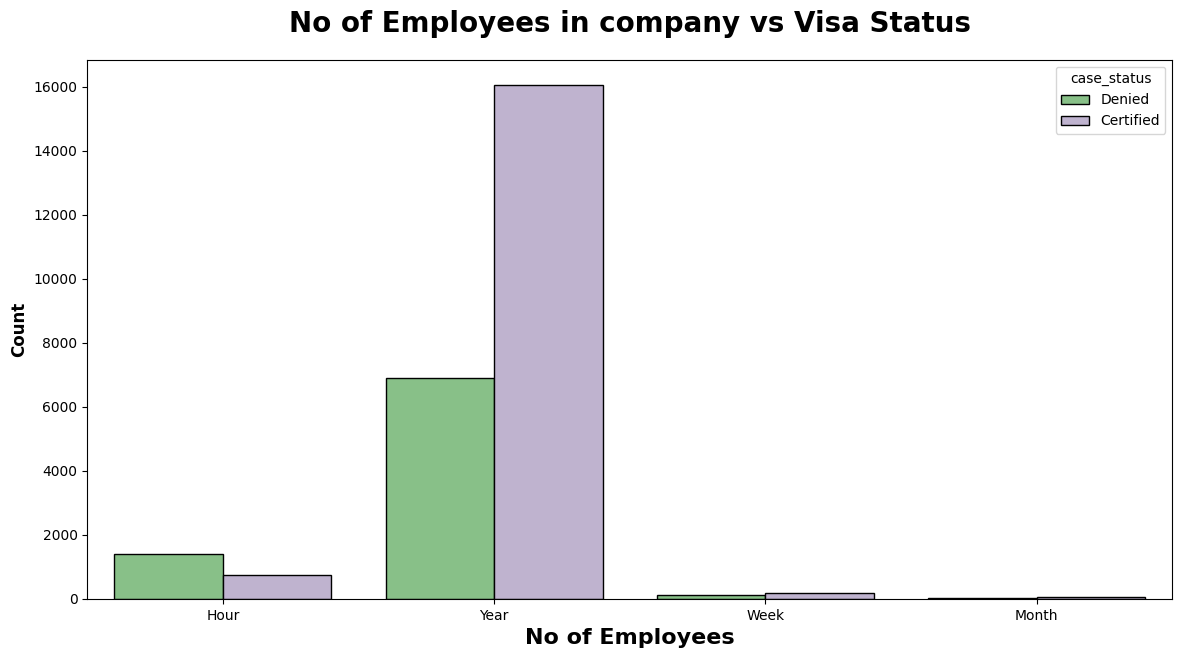

In [39]:
plt.subplots(figsize=(14,7))
sns.countplot(x="unit_of_wage",hue="case_status", data=df,ec='k', palette='Accent')
plt.title("No of Employees in company vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("No of Employees", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

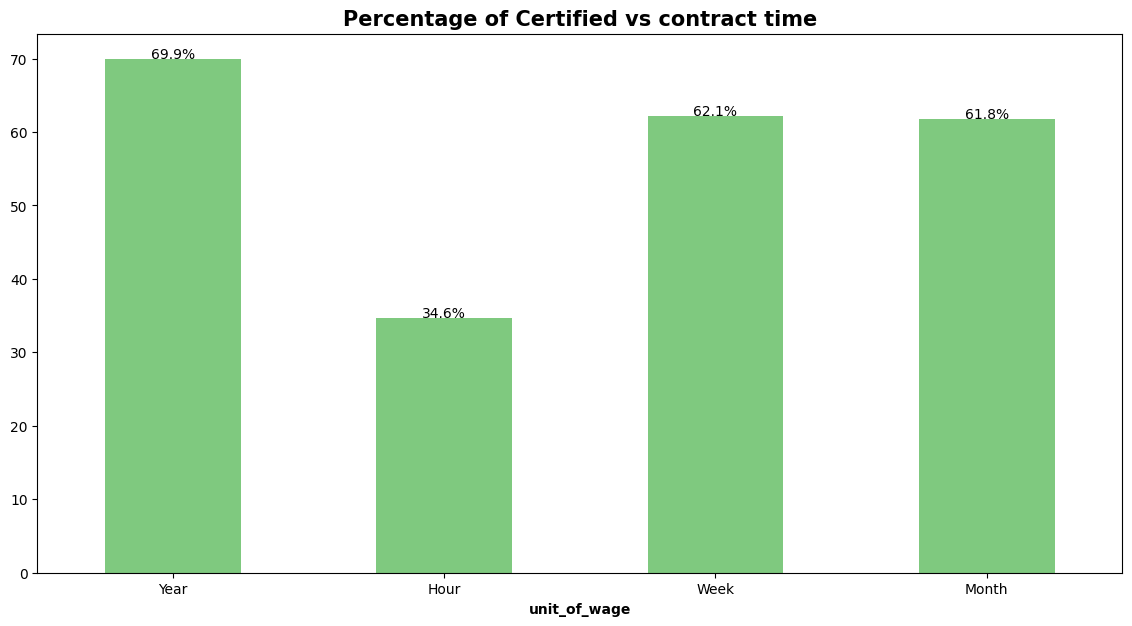

In [40]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs contract time" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('unit_of_wage' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
* For employees who applied for hourly pay 65% of them were denied.
* Yearly unit wage application were accepted for 69% and denied for 31% of the time.
* There is a higher chance of yearly contract than other and immediately followed by week and month.

### 4.7 Does Region of employment has impact on Visa status ?

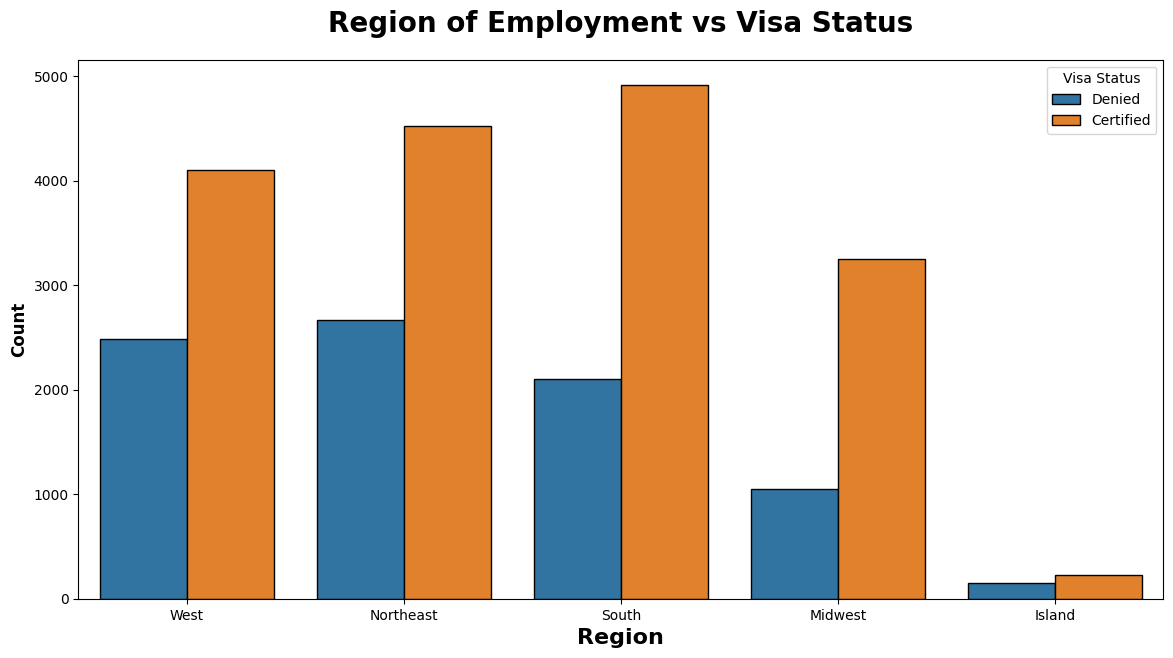

In [41]:
plt.subplots(figsize=(14,7))
sns.countplot(x="region_of_employment",hue="case_status", data=df,ec='k')
plt.title("Region of Employment vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

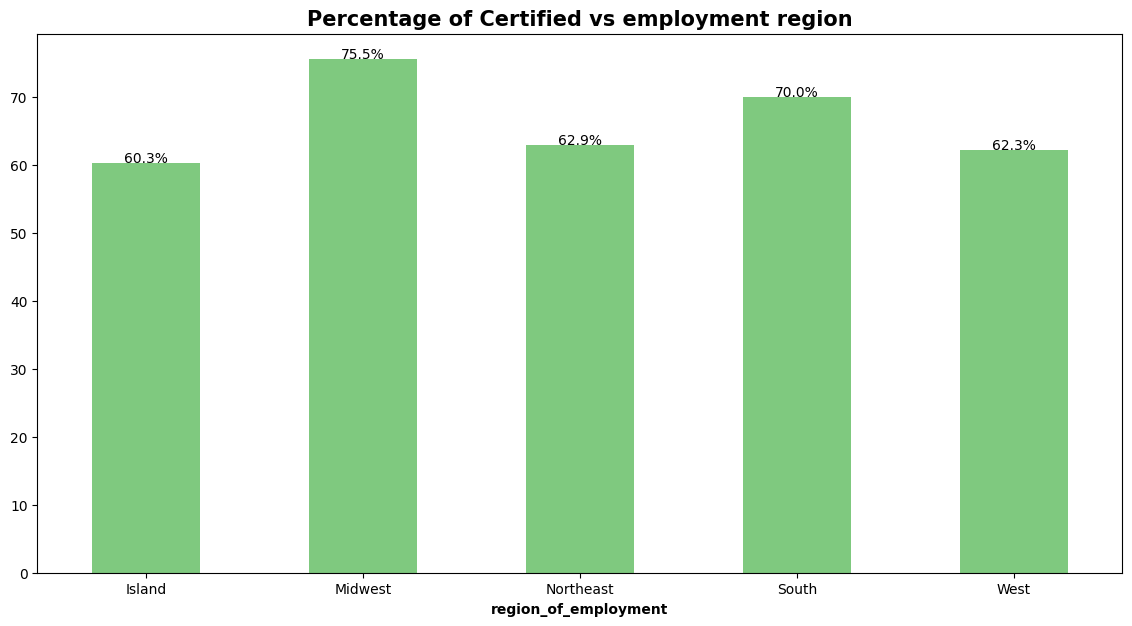

In [42]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs employment region" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('region_of_employment' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report** 
* As per chart all the region have very similar pattern of getting Visa certified and Denied.
* There is a slight edge for `midwest` followed by `South` region

### 4.8 Does Prevailing wage has any impact on Visa status ?

In [43]:
df.groupby('prevailing_wage').case_status.value_counts()

prevailing_wage  case_status
2.1367           Certified      1
2.9561           Denied         1
3.0031           Denied         1
3.3188           Denied         1
3.4889           Certified      1
                               ..
311734.4900      Certified      1
314156.0600      Certified      1
315497.6000      Certified      1
318446.0500      Certified      1
319210.2700      Denied         1
Name: count, Length: 25462, dtype: int64

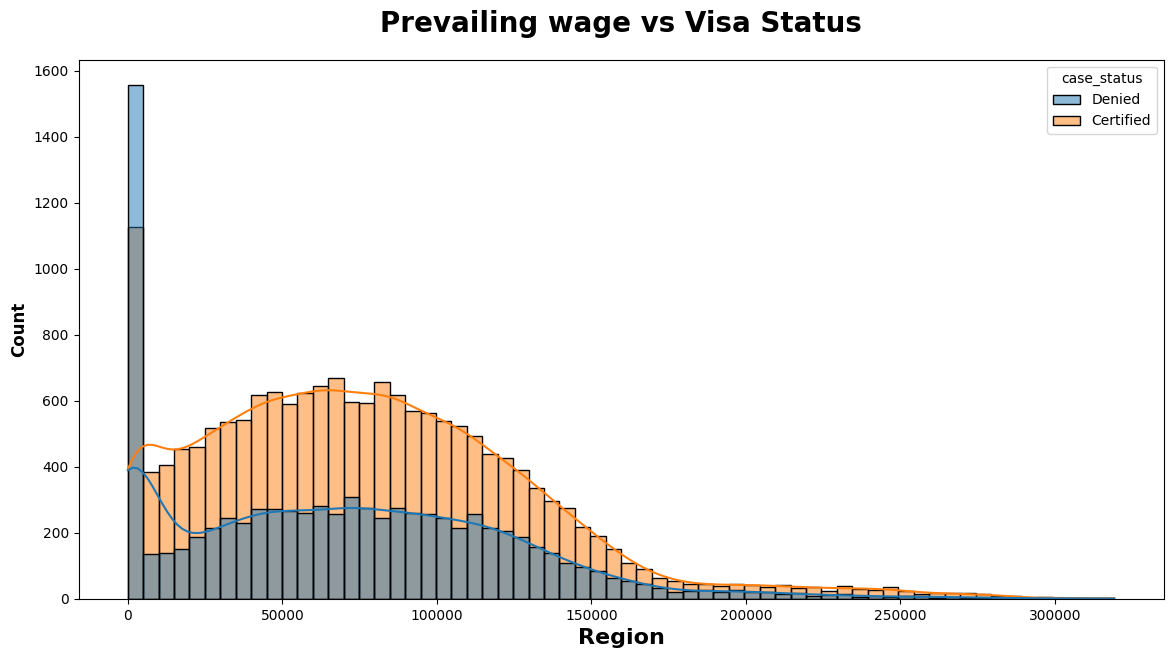

In [44]:
plt.subplots(figsize=(14,7))
sns.histplot(x="prevailing_wage",hue="case_status", data=df, kde=True)
plt.title("Prevailing wage vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

**Insights**
 - The distribution of both the classes are same but need to handel the outliers.

#### 4.8.1 Prevailing wage based on Education

In [45]:
print('Average Prevailing wage based on Employee education')
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Employee education


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


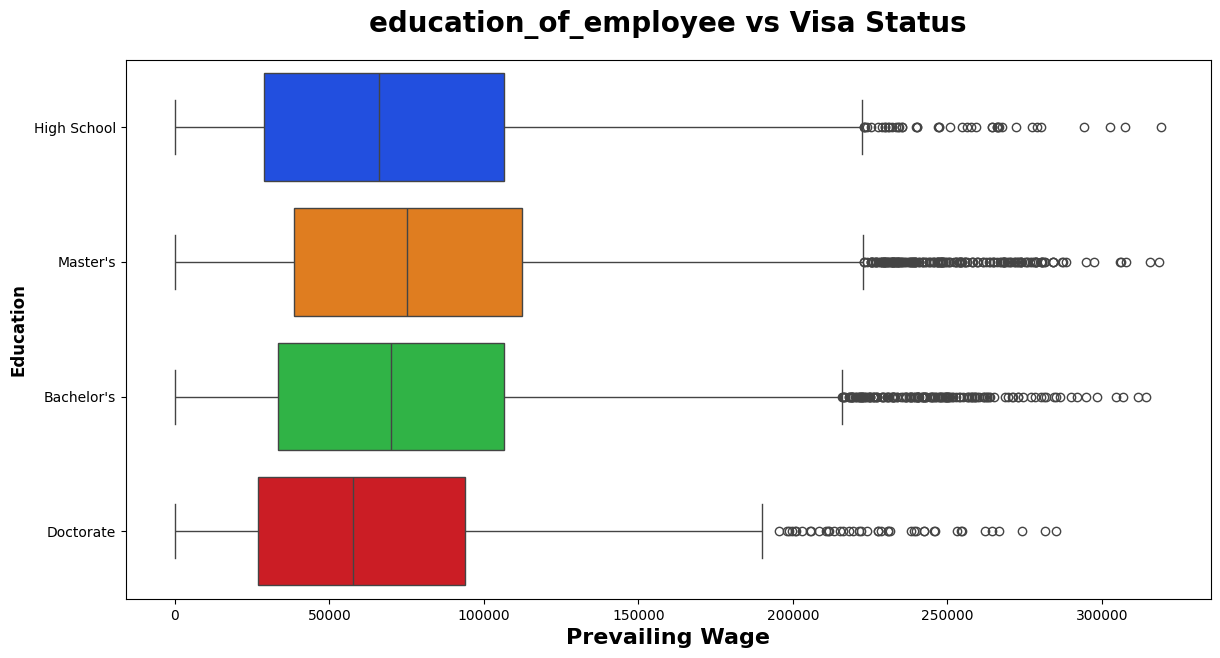

In [46]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="education_of_employee",x = "prevailing_wage", data=df,palette='bright')
plt.title("education_of_employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("Education", weight="bold", fontsize=12)
plt.show()

**Report**
* Based on the above table and charts its seen that applicant with Master's education has higher average prevailing wages.
* Master's education applicants have median salary of $78.8k, which approximately 20% higher than Doctrate's average wage, which is strange.

#### 4.8.2 Prevailing wage based on Job experience

In [47]:
print('Median Prevailing wage based on Job experience')
df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage',ascending=False)

Median Prevailing wage based on Job experience


,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665


**Report**
* Suprisingly people who has less job experience has more prevailing wage.
* No job experience applicant has median prevailing wage as 72k USD.
* Previous job experience applicant has median prevailing wage as 69K USD.

#### 4.8.3 Prevailing wage based on Continent

In [48]:
print('Average Prevailing wage based on Continent')
df.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Continent


,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


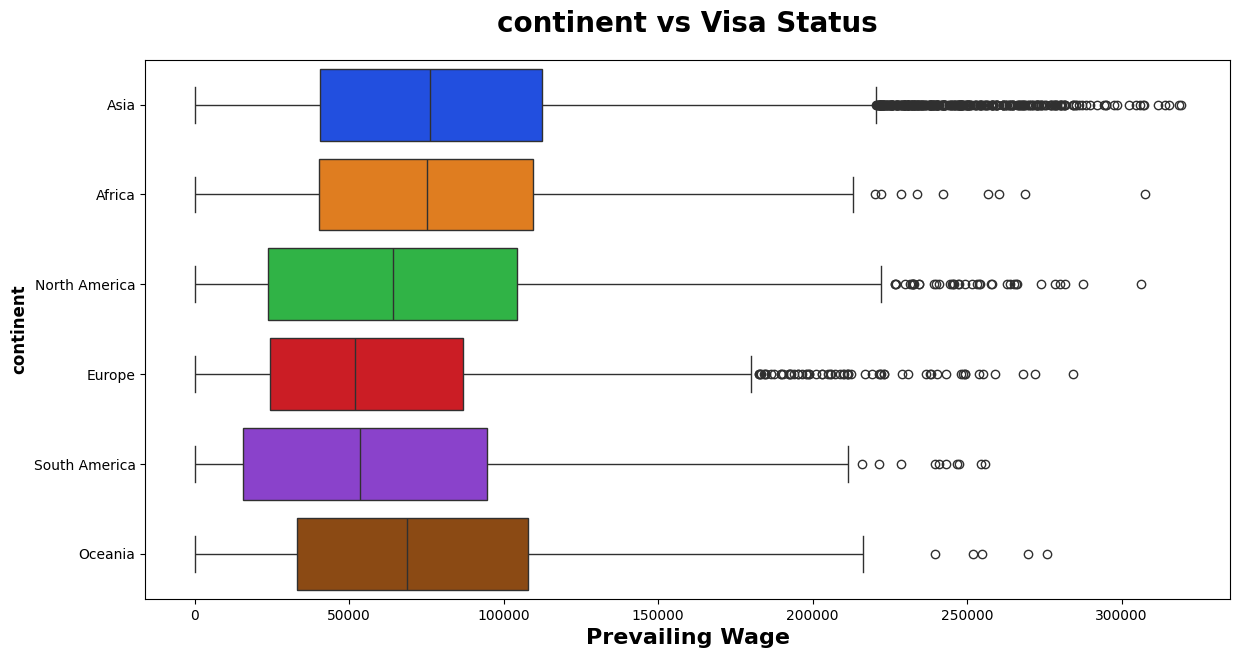

In [49]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="continent",x = "prevailing_wage", data=df,palette='bright')
plt.title("continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("continent", weight="bold", fontsize=12)
plt.show()

**Report**
* Average salary of people from Asia is higher than other continents.

### 4.9 Year of Establishment 

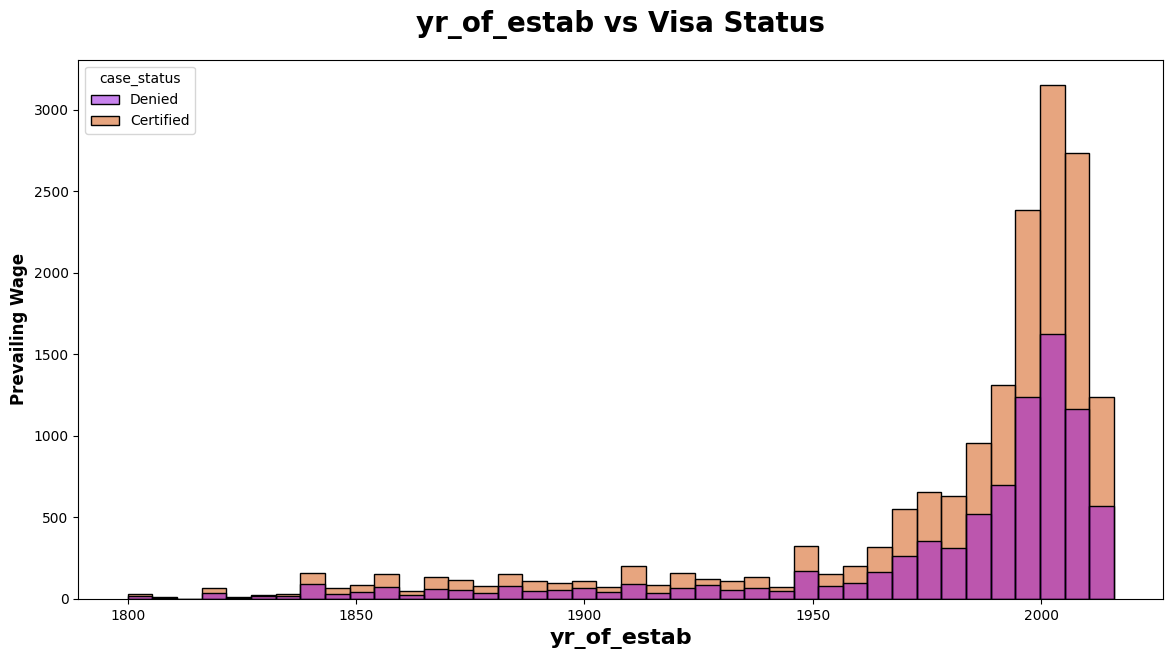

In [50]:
plt.subplots(figsize=(14,7))
sns.histplot(x = "yr_of_estab", data=df,palette='gnuplot', bins=40, hue='case_status')
plt.title("yr_of_estab vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("yr_of_estab", weight="bold", fontsize=16)
plt.ylabel("Prevailing Wage", weight="bold", fontsize=12)
plt.show()

**Report**
* Each bins consists of 5 years.
* Many companies were established after year 2000.
* The most company establishment happened in year 2000-2005.

### Final Report 
* `case_id` column can be dropped as it is an ID.
* `requires_job_training` column can be dropped as it doesn't have much impact on target variable, Proved in visualization and chi2 test.
* `no_of_employees`, `prevailing_wage` columns have outllier which should be handled.
* `continent` columns has few unique values with very less count, which can be made as **others**
* Target column `case_status` is imbalanced can be handled before model building.

In [ ]:
########################-------------Feature Engineering and Model Training in Next ipynb------------###########################